In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Загрузка данных

In [71]:
data = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


### 2. EDA

In [72]:
data.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume'],
      dtype='object')

In [73]:
data.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [74]:
data = data.drop(['rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description'], axis=1)
data

,holiday,temp,date_time,traffic_volume
0,NaN,288.28,2012-10-02 09:00:00,5545
1,NaN,289.36,2012-10-02 10:00:00,4516
2,NaN,289.58,2012-10-02 11:00:00,4767
3,NaN,290.13,2012-10-02 12:00:00,5026
4,NaN,291.14,2012-10-02 13:00:00,4918
...,...,...,...,...
48199,NaN,283.45,2018-09-30 19:00:00,3543
48200,NaN,282.76,2018-09-30 20:00:00,2781
48201,NaN,282.73,2018-09-30 21:00:00,2159
48202,NaN,282.09,2018-09-30 22:00:00,1450


In [75]:
data['date_time'] = pd.to_datetime(data['date_time'])

In [76]:
holiday_list = data['holiday'].unique()
holiday_list

array([nan, 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [77]:
data['traffic_volume'] = data['traffic_volume'].apply(lambda x: 0.00001 if x == 0 else x)

In [78]:
data['holiday'] = data['holiday'].apply(lambda x: 1 if not pd.isnull(x) else x)

In [79]:
data['holiday'] = data['holiday'].apply(lambda x: 0 if pd.isnull(x) else x)
data

,holiday,temp,date_time,traffic_volume
0,0.0,288.28,2012-10-02 09:00:00,5545.0
1,0.0,289.36,2012-10-02 10:00:00,4516.0
2,0.0,289.58,2012-10-02 11:00:00,4767.0
3,0.0,290.13,2012-10-02 12:00:00,5026.0
4,0.0,291.14,2012-10-02 13:00:00,4918.0
...,...,...,...,...
48199,0.0,283.45,2018-09-30 19:00:00,3543.0
48200,0.0,282.76,2018-09-30 20:00:00,2781.0
48201,0.0,282.73,2018-09-30 21:00:00,2159.0
48202,0.0,282.09,2018-09-30 22:00:00,1450.0


In [80]:
data.empty

False

In [81]:
nan_count = data.isna().sum()
nan_count

holiday           0
temp              0
date_time         0
traffic_volume    0
dtype: int64

In [82]:
data.dtypes

holiday                  float64
temp                     float64
date_time         datetime64[ns]
traffic_volume           float64
dtype: object

In [83]:
duplicate_rows = data[data.duplicated()]
duplicate_rows

,holiday,temp,date_time,traffic_volume
179,0.0,281.25,2012-10-10 07:00:00,6793.0
181,0.0,280.10,2012-10-10 08:00:00,6283.0
183,0.0,279.61,2012-10-10 09:00:00,5680.0
270,0.0,282.43,2012-10-14 09:00:00,2685.0
271,0.0,282.43,2012-10-14 09:00:00,2685.0
...,...,...,...,...
48072,0.0,284.25,2018-09-25 16:00:00,6597.0
48112,0.0,285.17,2018-09-27 07:00:00,6589.0
48173,0.0,280.68,2018-09-29 19:00:00,3818.0
48193,0.0,283.48,2018-09-30 14:00:00,4380.0


In [84]:
data.shape[0]

48204

In [85]:
data = data.drop_duplicates(subset=['date_time'])

In [86]:
data.shape[0]

40575

In [87]:
data[data.duplicated()].shape[0]

0

In [88]:
nan_count = data.isna().sum()
nan_count

holiday           0
temp              0
date_time         0
traffic_volume    0
dtype: int64

In [89]:
min_date = data['date_time'].min()
min_date

Timestamp('2012-10-02 09:00:00')

In [90]:
max_date = data['date_time'].max()
max_date

Timestamp('2018-09-30 23:00:00')

In [91]:
df = pd.DataFrame({'date_time': pd.date_range(start = min_date, end = max_date, freq ='1H')})
df

,date_time
0,2012-10-02 09:00:00
1,2012-10-02 10:00:00
2,2012-10-02 11:00:00
3,2012-10-02 12:00:00
4,2012-10-02 13:00:00
...,...
52546,2018-09-30 19:00:00
52547,2018-09-30 20:00:00
52548,2018-09-30 21:00:00
52549,2018-09-30 22:00:00


In [92]:
df = pd.merge(df, data, left_on='date_time', right_on='date_time', how='left')

In [93]:
df.isna().sum()

date_time             0
holiday           11976
temp              11976
traffic_volume    11976
dtype: int64

In [94]:
df = df.interpolate()

In [95]:
df['holiday'] = df['holiday'].apply(lambda x: 0 if pd.isnull(x) else x)

In [96]:
df.isna().sum()

date_time         0
holiday           0
temp              0
traffic_volume    0
dtype: int64

In [97]:
df.describe()

,date_time,holiday,temp,traffic_volume
count,52551,52551.000000,52551.000000,52551.000000
mean,2015-10-02 04:00:00,0.001056,282.503180,3071.868385
min,2012-10-02 09:00:00,0.000000,0.000000,0.000010
25%,2014-04-02 18:30:00,0.000000,273.580000,1223.058955
50%,2015-10-02 04:00:00,0.000000,286.420000,2896.500000
75%,2017-04-01 13:30:00,0.000000,291.703441,4775.000000
max,2018-09-30 23:00:00,1.000000,310.070000,7280.000000
std,NaN,0.032113,12.991269,1922.655704


In [98]:
df

,date_time,holiday,temp,traffic_volume
0,2012-10-02 09:00:00,0.0,288.28,5545.0
1,2012-10-02 10:00:00,0.0,289.36,4516.0
2,2012-10-02 11:00:00,0.0,289.58,4767.0
3,2012-10-02 12:00:00,0.0,290.13,5026.0
4,2012-10-02 13:00:00,0.0,291.14,4918.0
...,...,...,...,...
52546,2018-09-30 19:00:00,0.0,283.45,3543.0
52547,2018-09-30 20:00:00,0.0,282.76,2781.0
52548,2018-09-30 21:00:00,0.0,282.73,2159.0
52549,2018-09-30 22:00:00,0.0,282.09,1450.0


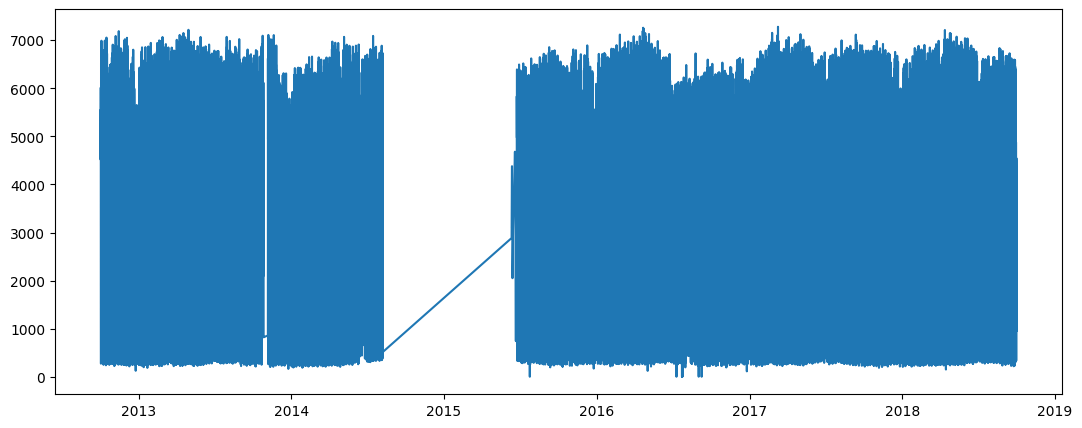

In [99]:
plt.figure(figsize=(13, 5))
plt.plot(df['date_time'], df['traffic_volume'])

На графике виден разрыв, который я заполнил линейными значениями, что является не релевантным. Такие данные не годятся для прогнозирования. Вход - отбросить данные старше первого января 2016 года.

In [100]:
import datetime

In [101]:
df = df.drop(df[df.date_time < datetime.datetime(year=2016, month=1, day=1)].index)

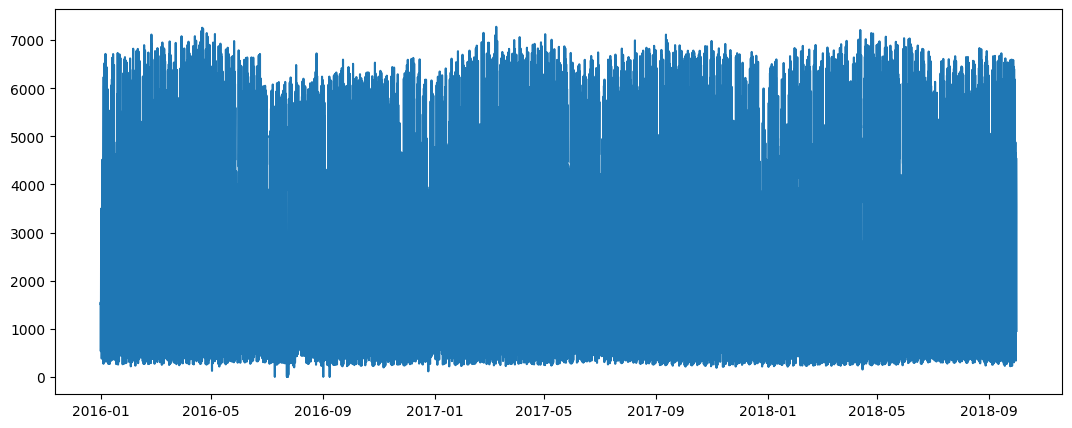

In [102]:
plt.figure(figsize=(13, 5))
plt.plot(df['date_time'], df['traffic_volume'])

In [103]:
sample = df.loc[df['date_time'] < datetime.datetime(year=2016, month=2, day=1)]

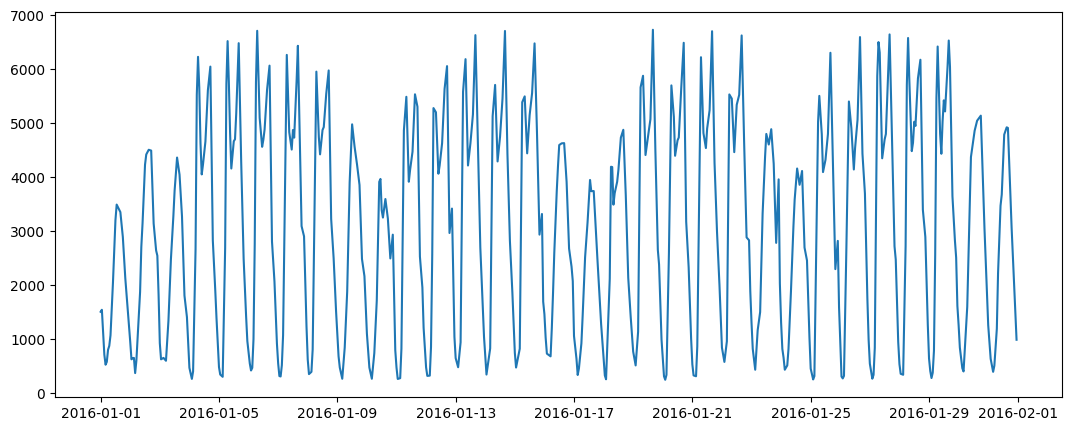

In [104]:
plt.figure(figsize=(13, 5))
plt.plot(sample['date_time'], sample['traffic_volume'])

In [105]:
df.describe()

,date_time,holiday,temp,traffic_volume
count,24096,24096.000000,24096.000000,24096.000000
mean,2017-05-16 23:30:00,0.001162,282.123048,3312.725909
min,2016-01-01 00:00:00,0.000000,243.390000,0.000010
25%,2016-09-07 23:45:00,0.000000,272.790000,1310.750000
50%,2017-05-16 23:30:00,0.000000,283.970000,3509.000000
75%,2018-01-22 23:15:00,0.000000,292.510000,4936.250000
max,2018-09-30 23:00:00,1.000000,310.070000,7280.000000
std,NaN,0.034069,12.652722,1963.519372


In [106]:
data_date_time = df[['date_time']]
data_date_time[data_date_time.duplicated()]

,date_time


[Методы разложения временных рядов](https://www.geeksforgeeks.org/time-series-decomposition-techniques/)

In [107]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [108]:
data_for_decompose = df[['date_time', 'traffic_volume']]
data_for_decompose

,date_time,traffic_volume
28455,2016-01-01 00:00:00,1513.0
28456,2016-01-01 01:00:00,1550.0
28457,2016-01-01 02:00:00,1134.5
28458,2016-01-01 03:00:00,719.0
28459,2016-01-01 04:00:00,533.0
...,...,...
52546,2018-09-30 19:00:00,3543.0
52547,2018-09-30 20:00:00,2781.0
52548,2018-09-30 21:00:00,2159.0
52549,2018-09-30 22:00:00,1450.0


In [109]:
data_for_decompose = data_for_decompose.set_index('date_time').asfreq('H')

In [110]:
data_for_decompose

,traffic_volume
date_time,
2016-01-01 00:00:00,1513.0
2016-01-01 01:00:00,1550.0
2016-01-01 02:00:00,1134.5
2016-01-01 03:00:00,719.0
2016-01-01 04:00:00,533.0
...,...
2018-09-30 19:00:00,3543.0
2018-09-30 20:00:00,2781.0
2018-09-30 21:00:00,2159.0


In [111]:
result = seasonal_decompose(data_for_decompose, model='multiplicative')

<Axes: xlabel='date_time'>

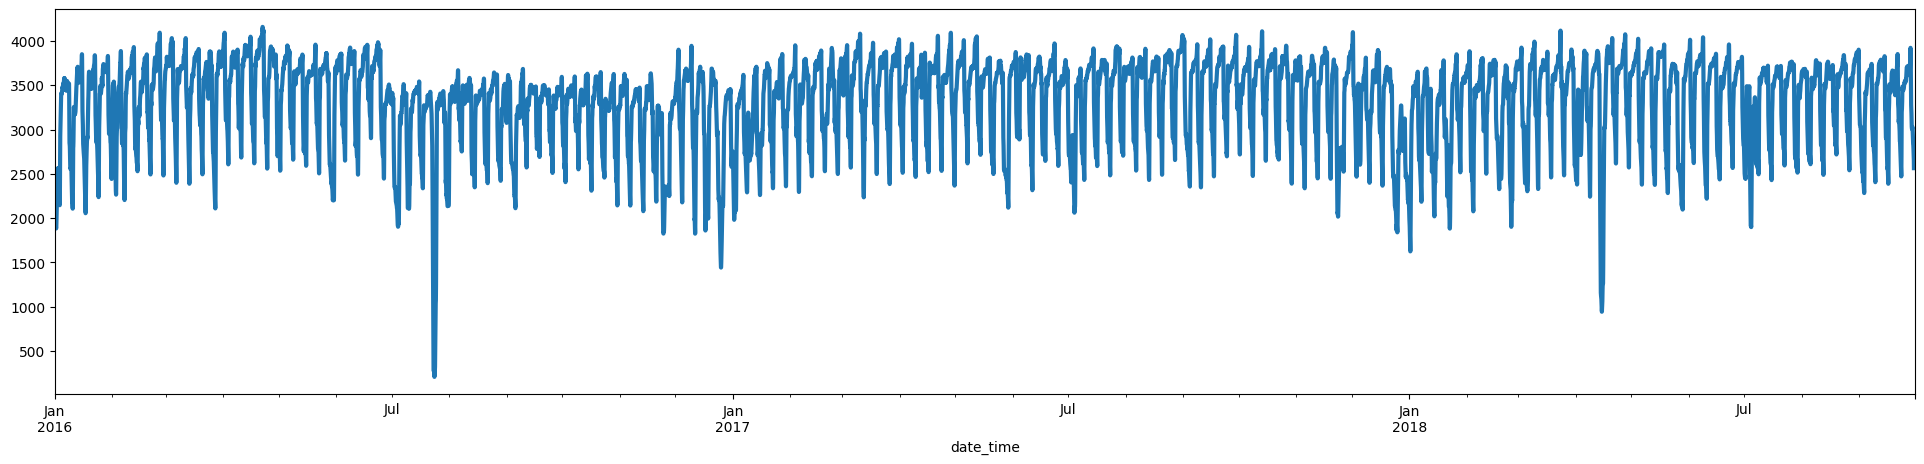

In [112]:
result.trend.plot(kind='line',figsize=(24,5), lw=3)

<Axes: xlabel='date_time'>

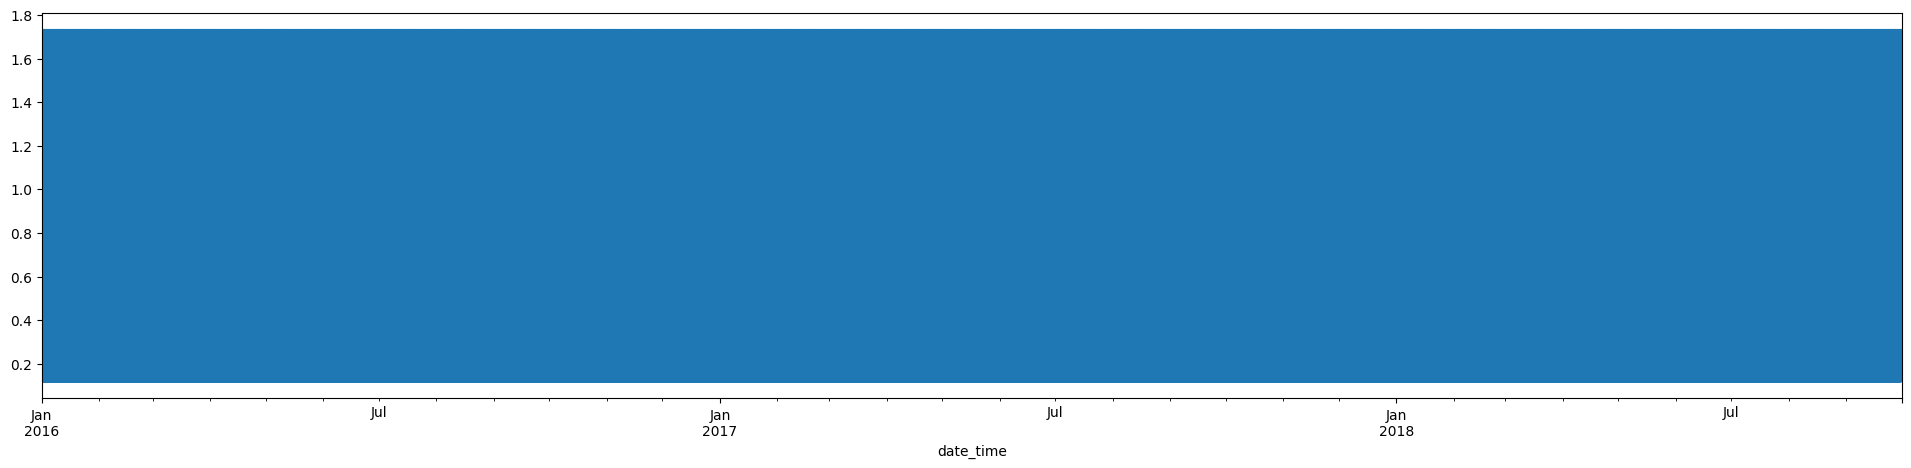

In [113]:
result.seasonal.plot(kind='line',figsize=(24,5), lw=3)

<Axes: xlabel='date_time'>

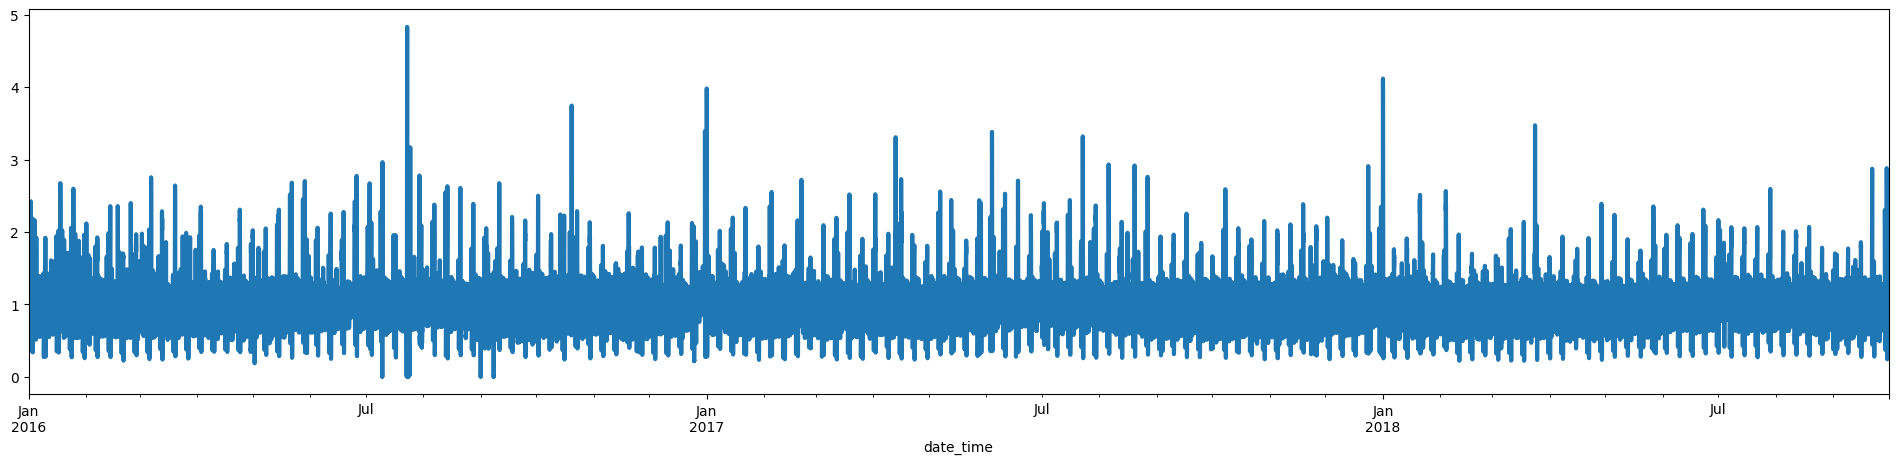

In [114]:
result.resid.plot(kind='line',figsize=(24,5), lw=3)

In [115]:
# breakpoint

### 3. Моделирование.

#### 3.1. Формирование дополнительных признаков: день недели, час и признаки гармонического ряда

In [116]:
import math

In [117]:
df.loc[:, "week_day"] = math.nan
df['week_day'] = df['date_time'].apply(lambda x: x.weekday())

In [118]:
df.loc[:, "hour"] = math.nan
df['hour'] = df['date_time'].apply(lambda x: x.hour)

In [119]:
df.loc[:, "week_day_hour"] = math.nan
df['week_day_hour'] = df['date_time'].apply(lambda x: x.weekday() *  100 + x.hour)

In [120]:
for i in range(1, 25):
    df[f'fourier_sin_{i}'] = np.sin(2 * math.pi * i * df['traffic_volume'])
    df[f'fourier_cos_{i}'] = np.cos(2 * math.pi * i * df['traffic_volume'])

In [121]:
fourier_features = [f for f in list(df) if f.startswith('fourier')]
fourier_features

['fourier_sin_1',
 'fourier_cos_1',
 'fourier_sin_2',
 'fourier_cos_2',
 'fourier_sin_3',
 'fourier_cos_3',
 'fourier_sin_4',
 'fourier_cos_4',
 'fourier_sin_5',
 'fourier_cos_5',
 'fourier_sin_6',
 'fourier_cos_6',
 'fourier_sin_7',
 'fourier_cos_7',
 'fourier_sin_8',
 'fourier_cos_8',
 'fourier_sin_9',
 'fourier_cos_9',
 'fourier_sin_10',
 'fourier_cos_10',
 'fourier_sin_11',
 'fourier_cos_11',
 'fourier_sin_12',
 'fourier_cos_12',
 'fourier_sin_13',
 'fourier_cos_13',
 'fourier_sin_14',
 'fourier_cos_14',
 'fourier_sin_15',
 'fourier_cos_15',
 'fourier_sin_16',
 'fourier_cos_16',
 'fourier_sin_17',
 'fourier_cos_17',
 'fourier_sin_18',
 'fourier_cos_18',
 'fourier_sin_19',
 'fourier_cos_19',
 'fourier_sin_20',
 'fourier_cos_20',
 'fourier_sin_21',
 'fourier_cos_21',
 'fourier_sin_22',
 'fourier_cos_22',
 'fourier_sin_23',
 'fourier_cos_23',
 'fourier_sin_24',
 'fourier_cos_24']

In [122]:
df.describe()

,date_time,holiday,temp,traffic_volume,week_day,hour,week_day_hour,fourier_sin_1,fourier_cos_1,fourier_sin_2,...,fourier_sin_20,fourier_cos_20,fourier_sin_21,fourier_cos_21,fourier_sin_22,fourier_cos_22,fourier_sin_23,fourier_cos_23,fourier_sin_24,fourier_cos_24
count,24096,24096.000000,24096.000000,24096.000000,24096.000000,24096.00000,24096.000000,2.409600e+04,24096.000000,2.409600e+04,...,2.409600e+04,24096.000000,2.409600e+04,24096.000000,2.409600e+04,24096.000000,2.409600e+04,24096.000000,2.409600e+04,24096.000000
mean,2017-05-16 23:30:00,0.001162,282.123048,3312.725909,3.005976,11.50000,312.097610,5.214355e-09,0.957752,1.042865e-08,...,1.042862e-07,0.993982,1.095240e-07,0.963189,1.146683e-07,0.992696,1.199081e-07,0.957752,1.251439e-07,0.998796
min,2016-01-01 00:00:00,0.000000,243.390000,0.000010,0.000000,0.00000,0.000000,-1.000000e+00,-1.000000,-1.000000e+00,...,-9.749279e-01,-1.000000,-1.000000e+00,-1.000000,-1.000000e+00,-1.000000,-1.000000e+00,-1.000000,-9.749279e-01,-0.900969
25%,2016-09-07 23:45:00,0.000000,272.790000,1310.750000,1.000000,5.75000,118.000000,-1.515302e-12,1.000000,-3.084106e-12,...,-3.202879e-11,1.000000,-6.264579e-12,1.000000,-9.792734e-11,1.000000,-6.350857e-11,1.000000,-3.646683e-11,1.000000
50%,2017-05-16 23:30:00,0.000000,283.970000,3509.000000,3.000000,11.50000,312.000000,-4.114665e-13,1.000000,-8.733682e-13,...,-8.639986e-12,1.000000,2.762280e-12,1.000000,-5.963257e-11,1.000000,-3.138740e-11,1.000000,-1.006164e-11,1.000000
75%,2018-01-22 23:15:00,0.000000,292.510000,4936.250000,5.000000,17.25000,506.000000,7.887258e-15,1.000000,-7.768414e-15,...,5.725989e-14,1.000000,2.013600e-11,1.000000,-2.387657e-11,1.000000,-1.031521e-11,1.000000,-7.776337e-14,1.000000
max,2018-09-30 23:00:00,1.000000,310.070000,7280.000000,6.000000,23.00000,623.000000,1.000000e+00,1.000000,1.000000e+00,...,9.749279e-01,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,9.749279e-01,1.000000
std,NaN,0.034069,12.652722,1963.519372,2.000531,6.92233,200.172782,6.043352e-02,0.281179,5.762110e-02,...,5.331898e-02,0.095690,2.844814e-02,0.267322,5.762110e-02,0.105997,6.043352e-02,0.281179,2.453130e-02,0.042472


In [123]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

In [124]:
df['traffic_volume_boxcox'], lam = boxcox(df['traffic_volume'])
df

,date_time,holiday,temp,traffic_volume,week_day,hour,week_day_hour,fourier_sin_1,fourier_cos_1,fourier_sin_2,...,fourier_cos_20,fourier_sin_21,fourier_cos_21,fourier_sin_22,fourier_cos_22,fourier_sin_23,fourier_cos_23,fourier_sin_24,fourier_cos_24,traffic_volume_boxcox
28455,2016-01-01 00:00:00,1.0,265.940,1513.0,4,0,400,-1.017172e-12,1.0,-2.034344e-12,...,1.0,7.743218e-12,1.0,-2.237778e-11,1.0,-2.339496e-11,1.0,4.691702e-12,1.0,284.401340
28456,2016-01-01 01:00:00,0.0,266.000,1550.0,4,1,401,-2.233211e-13,1.0,-4.466422e-13,...,1.0,1.531914e-11,1.0,-4.493083e-11,1.0,-1.786931e-11,1.0,-1.991162e-11,1.0,289.480996
28457,2016-01-01 02:00:00,0.0,266.005,1134.5,4,2,402,1.852426e-14,-1.0,-3.704852e-14,...,1.0,-1.598190e-11,-1.0,-3.314934e-11,1.0,2.407292e-11,-1.0,-1.499650e-11,1.0,230.282444
28458,2016-01-01 03:00:00,0.0,266.010,719.0,4,3,403,1.862726e-13,1.0,3.725452e-13,...,1.0,2.092735e-12,1.0,-2.136785e-11,1.0,-1.572461e-11,1.0,-1.008137e-11,1.0,164.737539
28459,2016-01-01 04:00:00,0.0,264.800,533.0,4,4,404,-3.508156e-13,1.0,-7.016312e-13,...,1.0,4.911051e-12,1.0,-3.170470e-12,1.0,-1.125199e-11,1.0,-4.781596e-12,1.0,132.161840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52546,2018-09-30 19:00:00,0.0,283.450,3543.0,6,19,619,-2.494928e-12,1.0,-4.989855e-12,...,1.0,-1.237571e-11,1.0,-7.671628e-11,1.0,-2.464153e-11,1.0,-3.077443e-11,1.0,530.127062
52547,2018-09-30 20:00:00,0.0,282.760,2781.0,6,20,620,-1.624524e-13,1.0,-3.249047e-13,...,1.0,3.296829e-11,1.0,-7.633353e-11,1.0,-1.101236e-11,1.0,-3.898856e-12,1.0,444.086547
52548,2018-09-30 21:00:00,0.0,282.730,2159.0,6,21,621,6.094798e-14,1.0,1.218960e-13,...,1.0,2.674576e-11,1.0,-4.959085e-11,1.0,-9.512133e-12,1.0,-2.764108e-11,1.0,368.991031
52549,2018-09-30 22:00:00,0.0,282.090,1450.0,6,22,622,-7.956841e-13,1.0,-1.591368e-12,...,1.0,1.057548e-11,1.0,-1.386707e-11,1.0,-9.205787e-12,1.0,-4.544502e-12,1.0,275.673963


In [125]:
df.dtypes

date_time                datetime64[ns]
holiday                         float64
temp                            float64
traffic_volume                  float64
week_day                          int64
hour                              int64
week_day_hour                     int64
fourier_sin_1                   float64
fourier_cos_1                   float64
fourier_sin_2                   float64
fourier_cos_2                   float64
fourier_sin_3                   float64
fourier_cos_3                   float64
fourier_sin_4                   float64
fourier_cos_4                   float64
fourier_sin_5                   float64
fourier_cos_5                   float64
fourier_sin_6                   float64
fourier_cos_6                   float64
fourier_sin_7                   float64
fourier_cos_7                   float64
fourier_sin_8                   float64
fourier_cos_8                   float64
fourier_sin_9                   float64
fourier_cos_9                   float64


#### 3.2. Разделение данных на обучающий и тестовый наборы данных. Тестовый набор данных - две последние недели

In [126]:
from datetime import datetime, timedelta

In [127]:
df_test = df.loc[df['date_time'] > max_date.to_pydatetime() - timedelta(days=14)]
df_test

,date_time,holiday,temp,traffic_volume,week_day,hour,week_day_hour,fourier_sin_1,fourier_cos_1,fourier_sin_2,...,fourier_cos_20,fourier_sin_21,fourier_cos_21,fourier_sin_22,fourier_cos_22,fourier_sin_23,fourier_cos_23,fourier_sin_24,fourier_cos_24,traffic_volume_boxcox
52215,2018-09-17 00:00:00,0.0,296.58,550.0,0,0,0,-3.523516e-14,1.0,-7.047033e-14,...,1.0,-3.013675e-12,1.0,-1.077962e-11,1.0,-3.993640e-12,1.0,2.792335e-12,1.0,135.254504
52216,2018-09-17 01:00:00,0.0,296.19,280.0,0,1,1,-1.254236e-13,1.0,-2.508473e-13,...,1.0,-1.269654e-12,1.0,-5.487804e-12,1.0,-2.429996e-12,1.0,6.278115e-13,1.0,82.133866
52217,2018-09-17 02:00:00,0.0,295.82,260.0,0,2,2,-1.489468e-13,1.0,-2.978935e-13,...,1.0,-2.218387e-12,1.0,-5.095818e-12,1.0,-6.972914e-13,1.0,-3.574722e-12,1.0,77.740757
52218,2018-09-17 03:00:00,0.0,295.83,344.0,0,3,3,-1.410991e-13,1.0,-2.821982e-13,...,1.0,-1.144092e-12,1.0,-6.742159e-12,1.0,-5.064269e-12,1.0,-3.386379e-12,1.0,95.659265
52219,2018-09-17 04:00:00,0.0,295.68,880.0,0,4,4,1.255227e-13,1.0,2.510454e-13,...,1.0,-1.911497e-12,1.0,-1.724738e-11,1.0,-1.803136e-11,1.0,-1.881533e-11,1.0,191.109388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52546,2018-09-30 19:00:00,0.0,283.45,3543.0,6,19,619,-2.494928e-12,1.0,-4.989855e-12,...,1.0,-1.237571e-11,1.0,-7.671628e-11,1.0,-2.464153e-11,1.0,-3.077443e-11,1.0,530.127062
52547,2018-09-30 20:00:00,0.0,282.76,2781.0,6,20,620,-1.624524e-13,1.0,-3.249047e-13,...,1.0,3.296829e-11,1.0,-7.633353e-11,1.0,-1.101236e-11,1.0,-3.898856e-12,1.0,444.086547
52548,2018-09-30 21:00:00,0.0,282.73,2159.0,6,21,621,6.094798e-14,1.0,1.218960e-13,...,1.0,2.674576e-11,1.0,-4.959085e-11,1.0,-9.512133e-12,1.0,-2.764108e-11,1.0,368.991031
52549,2018-09-30 22:00:00,0.0,282.09,1450.0,6,22,622,-7.956841e-13,1.0,-1.591368e-12,...,1.0,1.057548e-11,1.0,-1.386707e-11,1.0,-9.205787e-12,1.0,-4.544502e-12,1.0,275.673963


In [128]:
df_train = df.loc[df['date_time'] <= max_date.to_pydatetime() - timedelta(days=14)]
df_train

,date_time,holiday,temp,traffic_volume,week_day,hour,week_day_hour,fourier_sin_1,fourier_cos_1,fourier_sin_2,...,fourier_cos_20,fourier_sin_21,fourier_cos_21,fourier_sin_22,fourier_cos_22,fourier_sin_23,fourier_cos_23,fourier_sin_24,fourier_cos_24,traffic_volume_boxcox
28455,2016-01-01 00:00:00,1.0,265.940,1513.0,4,0,400,-1.017172e-12,1.0,-2.034344e-12,...,1.0,7.743218e-12,1.0,-2.237778e-11,1.0,-2.339496e-11,1.0,4.691702e-12,1.0,284.401340
28456,2016-01-01 01:00:00,0.0,266.000,1550.0,4,1,401,-2.233211e-13,1.0,-4.466422e-13,...,1.0,1.531914e-11,1.0,-4.493083e-11,1.0,-1.786931e-11,1.0,-1.991162e-11,1.0,289.480996
28457,2016-01-01 02:00:00,0.0,266.005,1134.5,4,2,402,1.852426e-14,-1.0,-3.704852e-14,...,1.0,-1.598190e-11,-1.0,-3.314934e-11,1.0,2.407292e-11,-1.0,-1.499650e-11,1.0,230.282444
28458,2016-01-01 03:00:00,0.0,266.010,719.0,4,3,403,1.862726e-13,1.0,3.725452e-13,...,1.0,2.092735e-12,1.0,-2.136785e-11,1.0,-1.572461e-11,1.0,-1.008137e-11,1.0,164.737539
28459,2016-01-01 04:00:00,0.0,264.800,533.0,4,4,404,-3.508156e-13,1.0,-7.016312e-13,...,1.0,4.911051e-12,1.0,-3.170470e-12,1.0,-1.125199e-11,1.0,-4.781596e-12,1.0,132.161840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52210,2018-09-16 19:00:00,0.0,303.020,3400.0,6,19,619,-2.367532e-12,1.0,-4.735064e-12,...,1.0,-1.333839e-11,1.0,-6.663762e-11,1.0,-6.172920e-11,1.0,1.386890e-12,1.0,514.396259
52211,2018-09-16 20:00:00,0.0,300.780,3092.0,6,20,620,-2.093142e-12,1.0,-4.186284e-12,...,1.0,6.975723e-12,1.0,-3.149721e-11,1.0,-1.176248e-11,1.0,7.972255e-12,1.0,479.889154
52212,2018-09-16 21:00:00,0.0,298.900,2623.0,6,21,621,9.704823e-13,1.0,1.940965e-12,...,1.0,2.190234e-12,1.0,-5.868492e-11,1.0,-6.135242e-11,1.0,-5.812255e-12,1.0,425.485006
52213,2018-09-16 22:00:00,0.0,297.850,1725.0,6,22,622,-1.040675e-12,1.0,-2.081351e-12,...,1.0,-5.483277e-12,1.0,-2.653284e-11,1.0,-1.847856e-11,1.0,-1.042429e-11,1.0,313.078660


### 3.3. Baseline прогноз

In [129]:
import pmdarima as pm
import plotly.graph_objects as go

##### 3.3.1. Baseline по признакам гармонического ряда

In [130]:
model = pm.auto_arima(
    df_train['traffic_volume_boxcox'],
    X=df_train[fourier_features],
    seasonal=True,
    stepwise=True,
    suppress_warnings=True,
    max_order=None,
    information_criterion='aicc',
    error_action='ignore')

c:\Users\MVKiselev\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning:

divide by zero encountered in reciprocal

c:\Users\MVKiselev\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning:

divide by zero encountered in reciprocal

c:\Users\MVKiselev\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning:

divide by zero encountered in reciprocal

c:\Users\MVKiselev\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning:

divide by zero encountered in reciprocal

c:\Users\MVKiselev\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning:

divide by zero encountered in reciprocal

c:\Users\MVKiselev\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statesp

In [131]:
boxcox_forecasts = model.predict(n_periods=len(df_test), X=df_test[fourier_features])
forecasts = inv_boxcox(boxcox_forecasts, lam)

c:\Users\MVKiselev\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\MVKiselev\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [ ]:
model.aic()

In [132]:
df_train_view = df.loc[df['date_time'] > max_date.to_pydatetime() - timedelta(days=30)]

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_train_view['date_time'], y=df_train_view['traffic_volume'], name='Train'))
fig.add_trace(go.Scatter(x=df_test['date_time'], y=df_test['traffic_volume'], name='Test'))
fig.add_trace(go.Scatter(x=df_test['date_time'], y=forecasts, name='Forecast'))
fig.update_layout(template='simple_white', font=dict(size=18), title_text='', width=1000, height=400, xaxis_title='Date', yaxis_title='Traffic Volume')

c:\Users\MVKiselev\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



##### 3.3.2. Baseline по принакам 'week_day', 'hour', 'holiday', 'temp'

In [148]:
model = pm.auto_arima(
    df_train['traffic_volume_boxcox'],
    X=df_train[['week_day', 'hour', 'holiday', 'temp']],
    seasonal=True,
    stepwise=True,
    suppress_warnings=True,
    max_order=None,
    information_criterion='aicc',
    error_action='ignore')

In [149]:
boxcox_forecasts = model.predict(n_periods=len(df_test), X=df_test[['week_day', 'hour', 'holiday', 'temp']])
forecasts = inv_boxcox(boxcox_forecasts, lam)

c:\Users\MVKiselev\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\MVKiselev\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [150]:
model.aic()

265466.2526027099

In [151]:
df_train_view = df.loc[df['date_time'] > max_date.to_pydatetime() - timedelta(days=30)]

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_train_view['date_time'], y=df_train_view['traffic_volume'], name='Train'))
fig.add_trace(go.Scatter(x=df_test['date_time'], y=df_test['traffic_volume'], name='Test'))
fig.add_trace(go.Scatter(x=df_test['date_time'], y=forecasts, name='Forecast'))
fig.update_layout(template='simple_white', font=dict(size=18), title_text='', width=1000, height=400, xaxis_title='Date', yaxis_title='Traffic Volume')

c:\Users\MVKiselev\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



##### 3.3.3. Baseline по синтетическому признаку 'week_day_hour'

In [154]:
model = pm.auto_arima(
    df_train['traffic_volume_boxcox'],
    X=df_train[['week_day_hour']],
    seasonal=True,
    stepwise=True,
    #start_p=1,
    #start_q=1,
    #max_p=3,
    #max_q=3,
    m=24*7,
    #start_P=0,
    #d=1,
    #D=1,
    trace=True,
    error_action='ignore',  
    suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[168] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,0)(0,0,0)[168] intercept   : AIC=326425.579, Time=4.48 sec


MemoryError: Unable to allocate 5.06 GiB for an array with shape (169, 169, 23760) and data type float64

In [145]:
boxcox_forecasts = model.predict(n_periods=len(df_test), X=df_test[['week_day_hour']])
forecasts = inv_boxcox(boxcox_forecasts, lam)

c:\Users\MVKiselev\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\MVKiselev\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [146]:
model.aic()

261602.71370426603

In [147]:
df_train_view = df.loc[df['date_time'] > max_date.to_pydatetime() - timedelta(days=30)]

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_train_view['date_time'], y=df_train_view['traffic_volume'], name='Train'))
fig.add_trace(go.Scatter(x=df_test['date_time'], y=df_test['traffic_volume'], name='Test'))
fig.add_trace(go.Scatter(x=df_test['date_time'], y=forecasts, name='Forecast'))
fig.update_layout(template='simple_white', font=dict(size=18), title_text='', width=1000, height=400, xaxis_title='Date', yaxis_title='Traffic Volume')

c:\Users\MVKiselev\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

